# Business Understanding

## Project Domain

Proyek ini berada pada persimpangan antara psikologi dan kecerdasan buatan. Dataset yang digunakan berasal dari hasil survei psikologi yang mencerminkan karakteristik kepribadian manusia. Pendekatan yang digunakan berbasis pada supervised learning dalam machine learning untuk melakukan klasifikasi kepribadian.

## Problem Statements

Bagaimana cara membangun sebuah model machine learning yang mampu memprediksi tipe kepribadian manusia berdasarkan jawaban terhadap kuesioner psikologi?



## Goals

Mengembangkan model klasifikasi yang dapat mengidentifikasi tipe kepribadian manusia dari data survei.

Meningkatkan akurasi prediksi kepribadian melalui eksplorasi berbagai algoritma machine learning.

Memberikan pemahaman data melalui visualisasi dan analisis eksploratif.

Menyediakan sistem prediksi yang dapat digunakan untuk pengambilan keputusan di bidang HR, psikologi, atau sistem rekomendasi.

## Solution Statements

Menggunakan dataset psikologi yang telah diproses dan dibersihkan.

Menerapkan teknik preprocessing seperti encoding dan scaling pada fitur dataset.

Menggunakan model supervised learning seperti Decision Tree, Random Forest, SVM, dan Logistic Regression untuk klasifikasi kepribadian.

Mengevaluasi performa model dengan metrik seperti accuracy, precision, recall, dan confusion matrix.

Menyediakan visualisasi hasil prediksi untuk interpretasi yang lebih mudah.



# Data Understanding

## Import data dari kaggle

In [58]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"zidansabillahusain","key":"f707885220bbd115a8a31b50ad3bbf6a"}'}

In [59]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [60]:
!kaggle datasets download -d rakeshkapilavai/predicting-human-personality

403 Client Error: Forbidden for url: https://www.kaggle.com/api/v1/datasets/metadata/rakeshkapilavai/predicting-human-personality


In [61]:
!mkdir traffic-predicting-human-personality
!unzip traffic-prediction-dataset.zip -rakeshkapilavai/predicting-human-personality
!ls traffic-predicting-human-personality

unzip:  cannot find or open traffic-prediction-dataset.zip, traffic-prediction-dataset.zip.zip or traffic-prediction-dataset.zip.ZIP.


## Import Library yang dibutuhkan

In [62]:
import pandas as pd # Import the pandas library and assign it to the alias 'pd'
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping

## Exploratory Data Analysis

In [63]:
df = pd.read_csv('/content/personality_dataset.csv')

In [64]:
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2837 non-null   float64
 1   Stage_fear                 2827 non-null   object 
 2   Social_event_attendance    2838 non-null   float64
 3   Going_outside              2834 non-null   float64
 4   Drained_after_socializing  2848 non-null   object 
 5   Friends_circle_size        2823 non-null   float64
 6   Post_frequency             2835 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB


In [66]:
df.describe()

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
count,2837.000000,2838.000000,2834.000000,2823.000000,2835.000000
mean,4.505816,3.963354,3.000000,6.268863,3.564727
std,3.479192,2.903827,2.247327,4.289693,2.926582
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,1.000000,3.000000,1.000000
50%,4.000000,3.000000,3.000000,5.000000,3.000000
75%,8.000000,6.000000,5.000000,10.000000,6.000000
max,11.000000,10.000000,7.000000,15.000000,10.000000


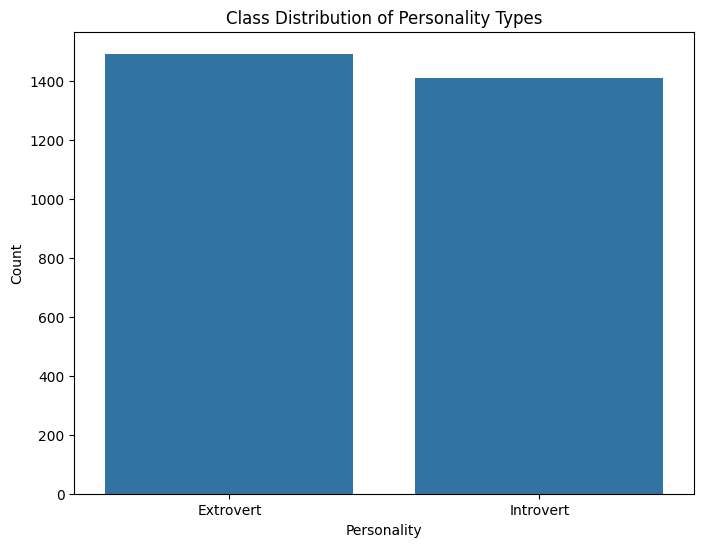

In [67]:
# Class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Personality', data=df)
plt.title('Class Distribution of Personality Types')
plt.xlabel('Personality')
plt.ylabel('Count')
plt.show()

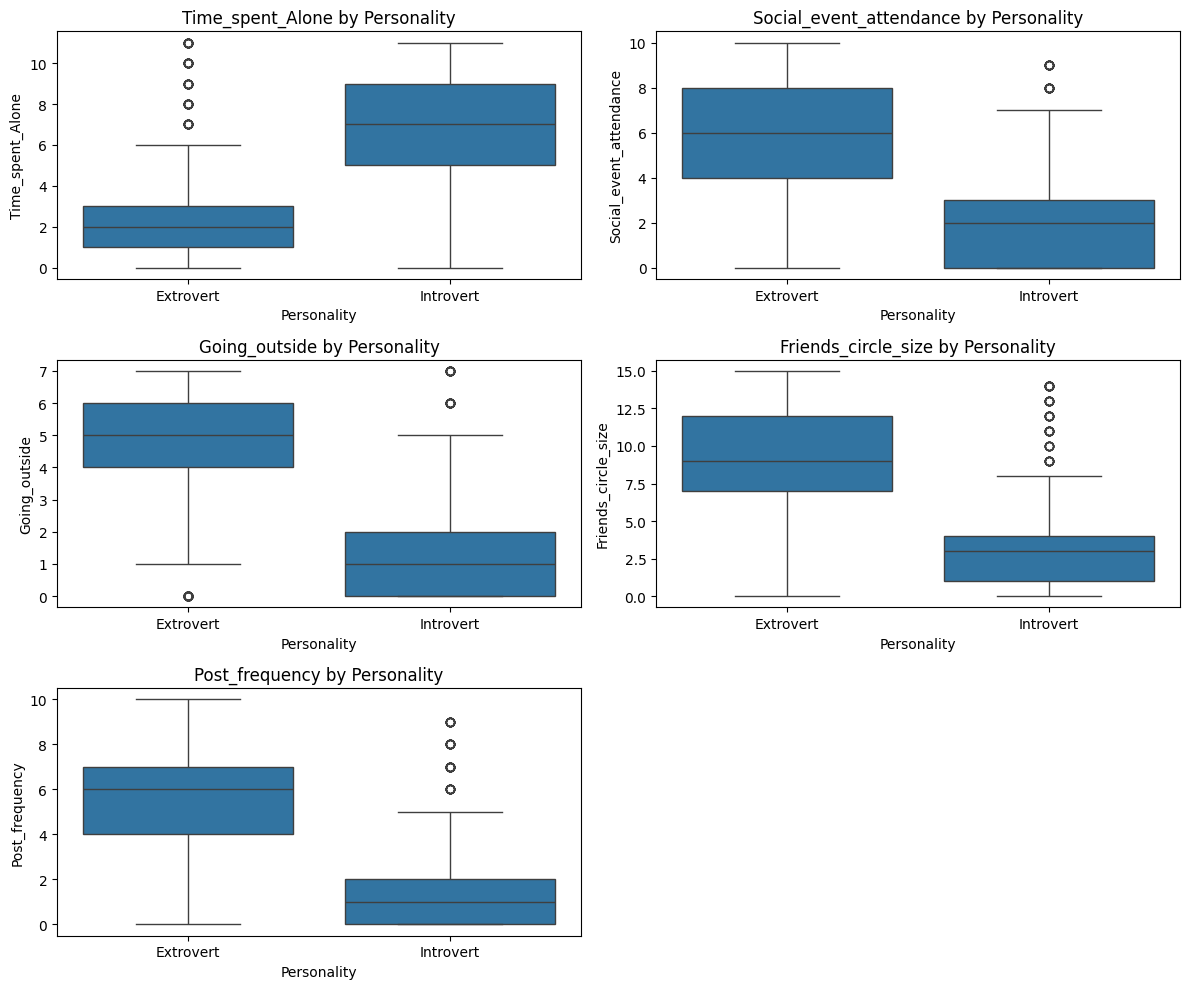

In [68]:
import numpy as np
numeric_columns = df.select_dtypes(include=np.number).columns
target_column = 'Personality'

plt.figure(figsize=(12, 10))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x=target_column, y=col, data=df)
    plt.title(f'{col} by Personality')
plt.tight_layout()
plt.show()

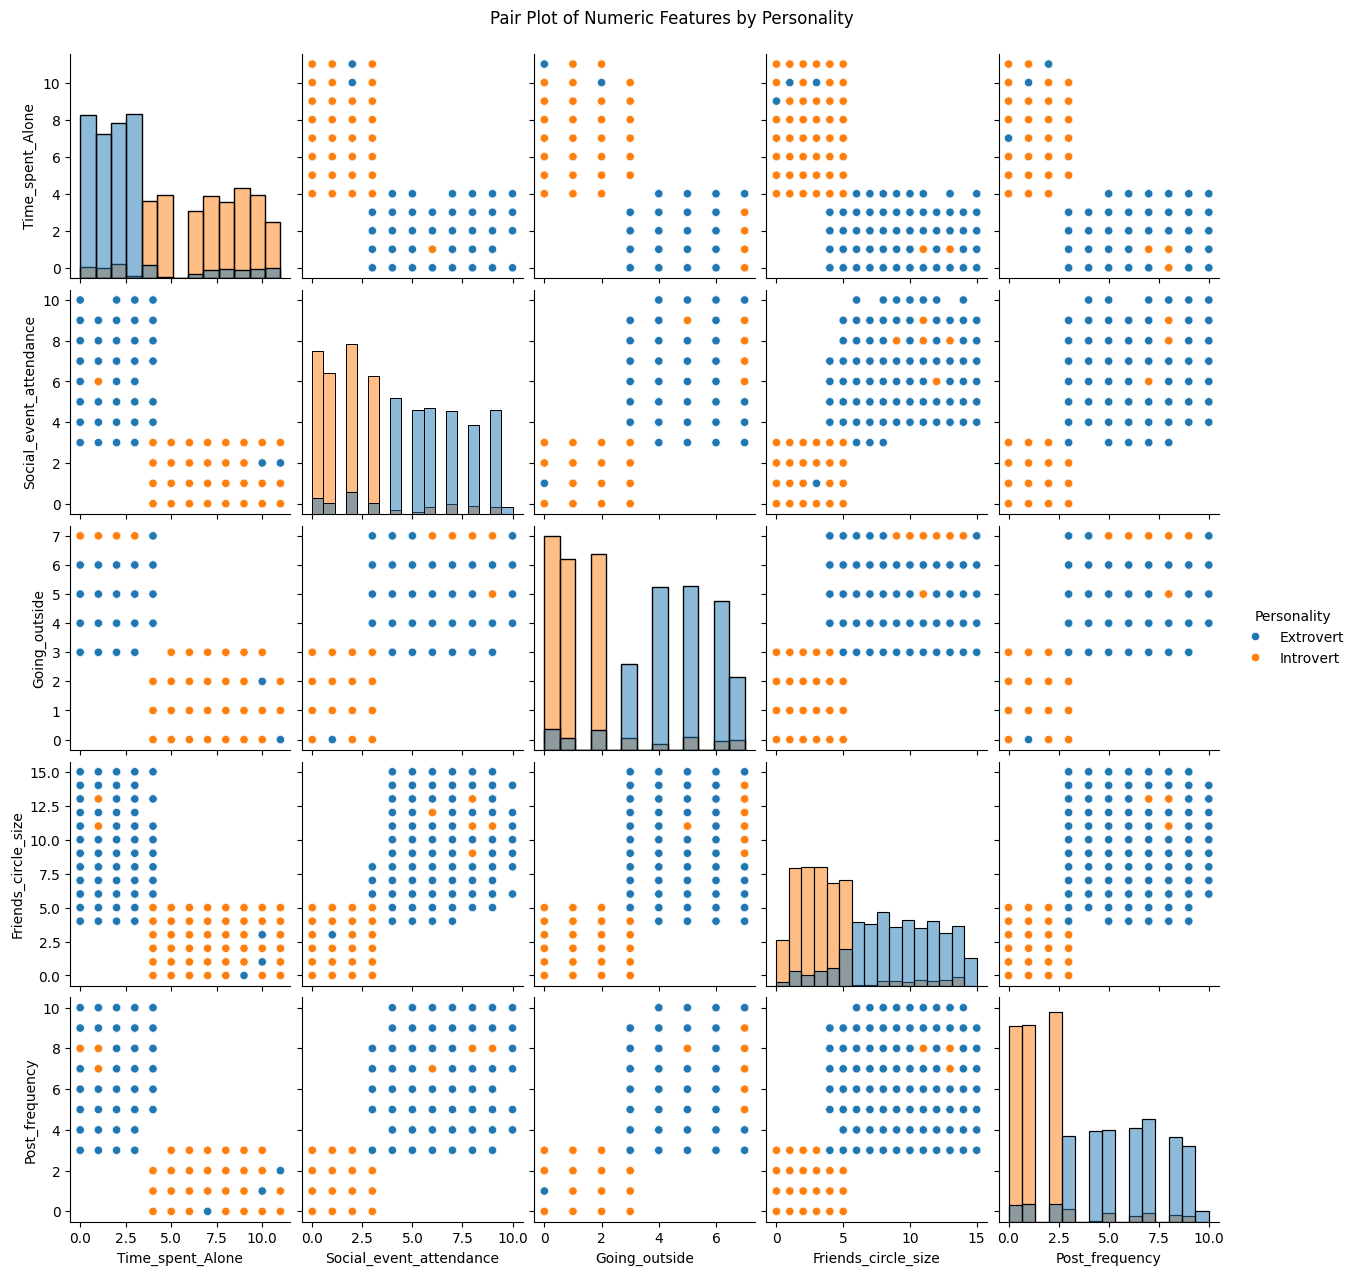

In [69]:
sns.pairplot(df[list(numeric_columns) + [target_column]], hue=target_column, diag_kind='hist')
plt.suptitle('Pair Plot of Numeric Features by Personality', y=1.02)
plt.show()

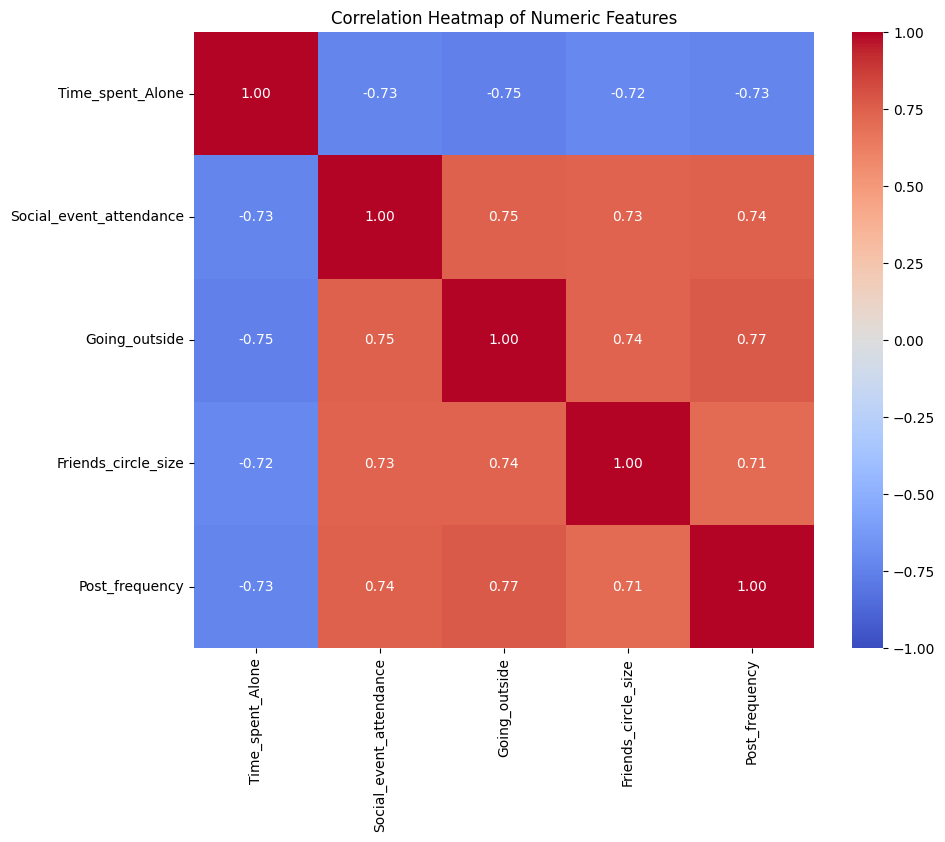

In [70]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[numeric_columns].corr(), annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

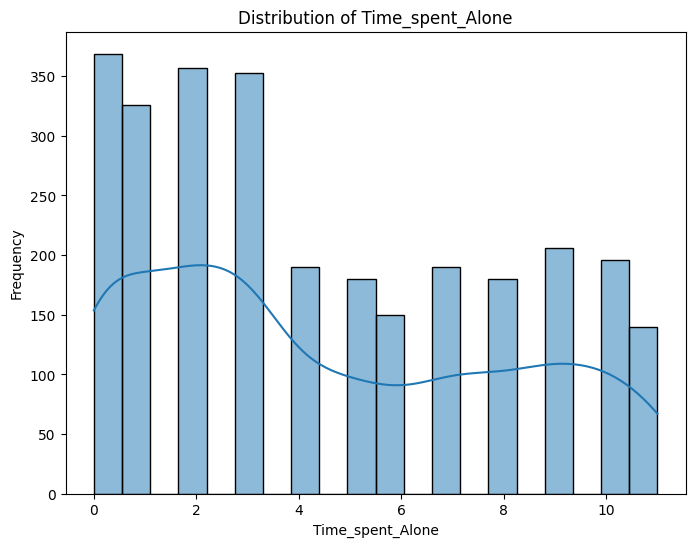

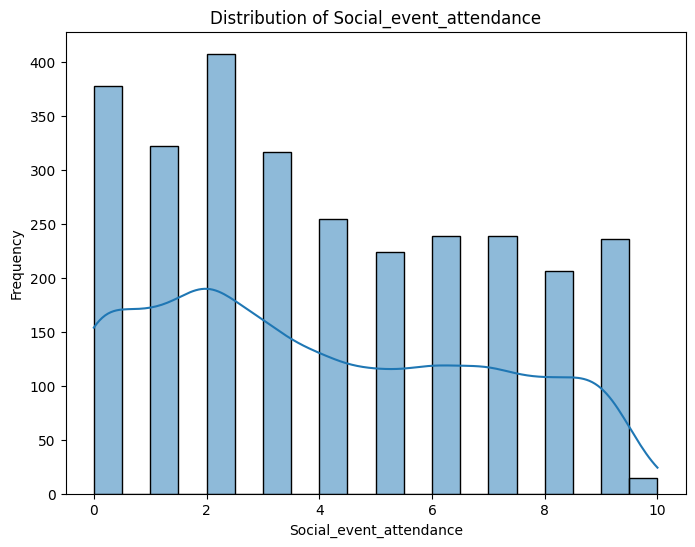

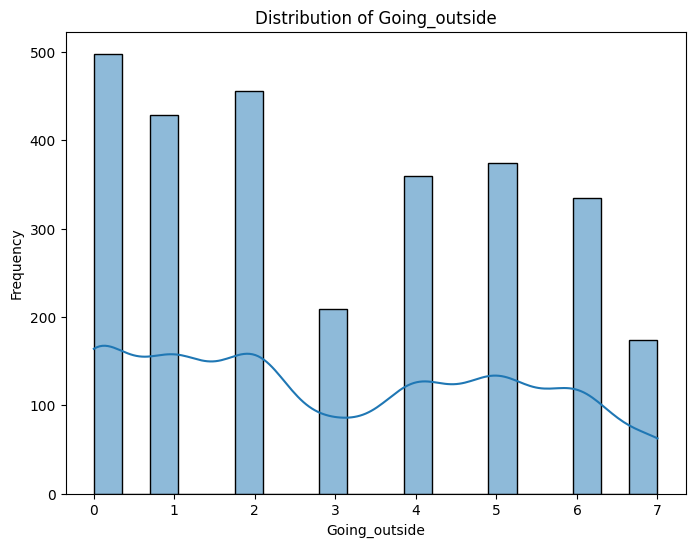

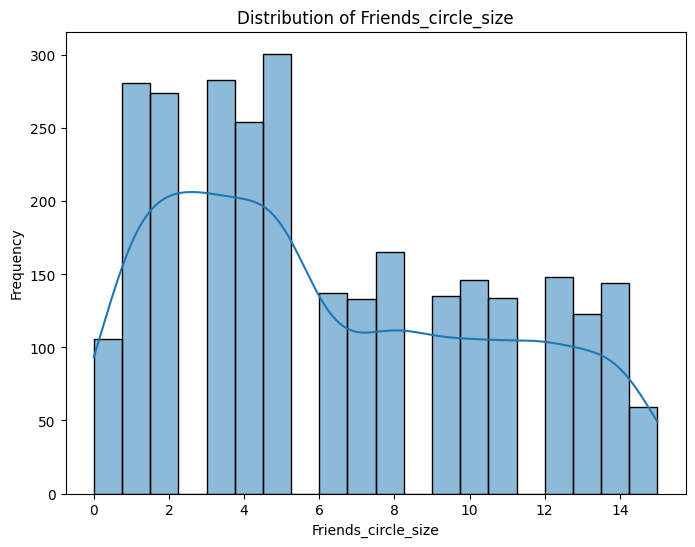

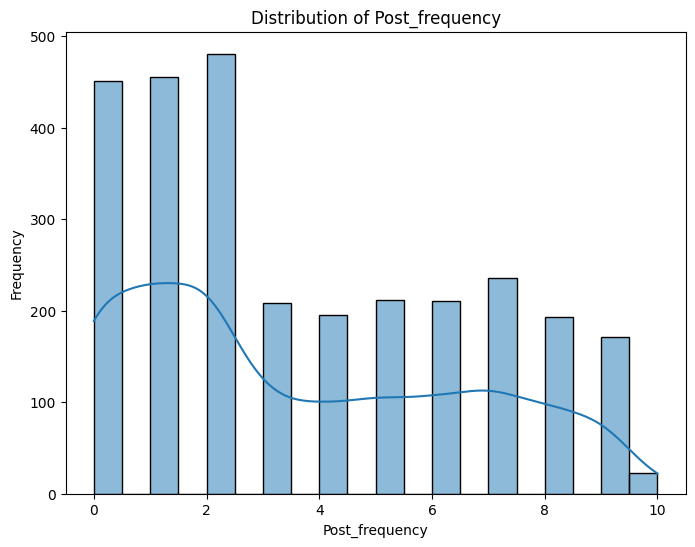

In [73]:
# prompt: buatkan histogram sesuai dataset

import matplotlib.pyplot as plt
# Buat histogram untuk setiap kolom numerik
for col in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=col, kde=True, bins=20)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Data Preparation

In [74]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df[target_column] = le.fit_transform(df[target_column])
print(f"Encoded classes: {dict(zip(le.classes_, le.transform(le.classes_)))}")

Encoded classes: {'Extrovert': np.int64(0), 'Introvert': np.int64(1)}


In [75]:
from sklearn.impute import SimpleImputer

numeric_imputer = SimpleImputer(strategy='median')
df[numeric_columns] = numeric_imputer.fit_transform(df[numeric_columns])

In [76]:
from sklearn.impute import SimpleImputer

categorical_imputer = SimpleImputer(strategy='most_frequent')
categorical_columns = ['Stage_fear', 'Drained_after_socializing']
df[categorical_columns] = categorical_imputer.fit_transform(df[categorical_columns])

In [77]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Separate features (X) and target variable (y)
X = df.drop(columns=[target_column])
y = df[target_column]

# Identify categorical and numerical columns
categorical_features = ['Stage_fear', 'Drained_after_socializing']
numerical_features = X.select_dtypes(include=np.number).columns.tolist()
# Remove categorical columns from numerical_features list if they were included
numerical_features = [col for col in numerical_features if col not in categorical_features]


# Create a column transformer to apply different preprocessing steps to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough' # Keep other columns (if any) - although in this case there shouldn't be any left
)

# Apply the preprocessing
X_scaled = preprocessor.fit_transform(X)

In [78]:
from sklearn.model_selection import train_test_split

# ----> Split the data into training and testing sets ---
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42) # Adjust test_size and random_state as needed

# Modeling

In [79]:
model = keras.Sequential([
    keras.Input(shape=(X_train.shape[1],)),
    layers.Dense(128, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(len(le.classes_), activation="softmax")
])


In [80]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [81]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 128)            │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,682 (45.63 KB)

 Trainable params: 11,682 (45.63 KB)

 Non-trainable params: 0 (0.00 B)

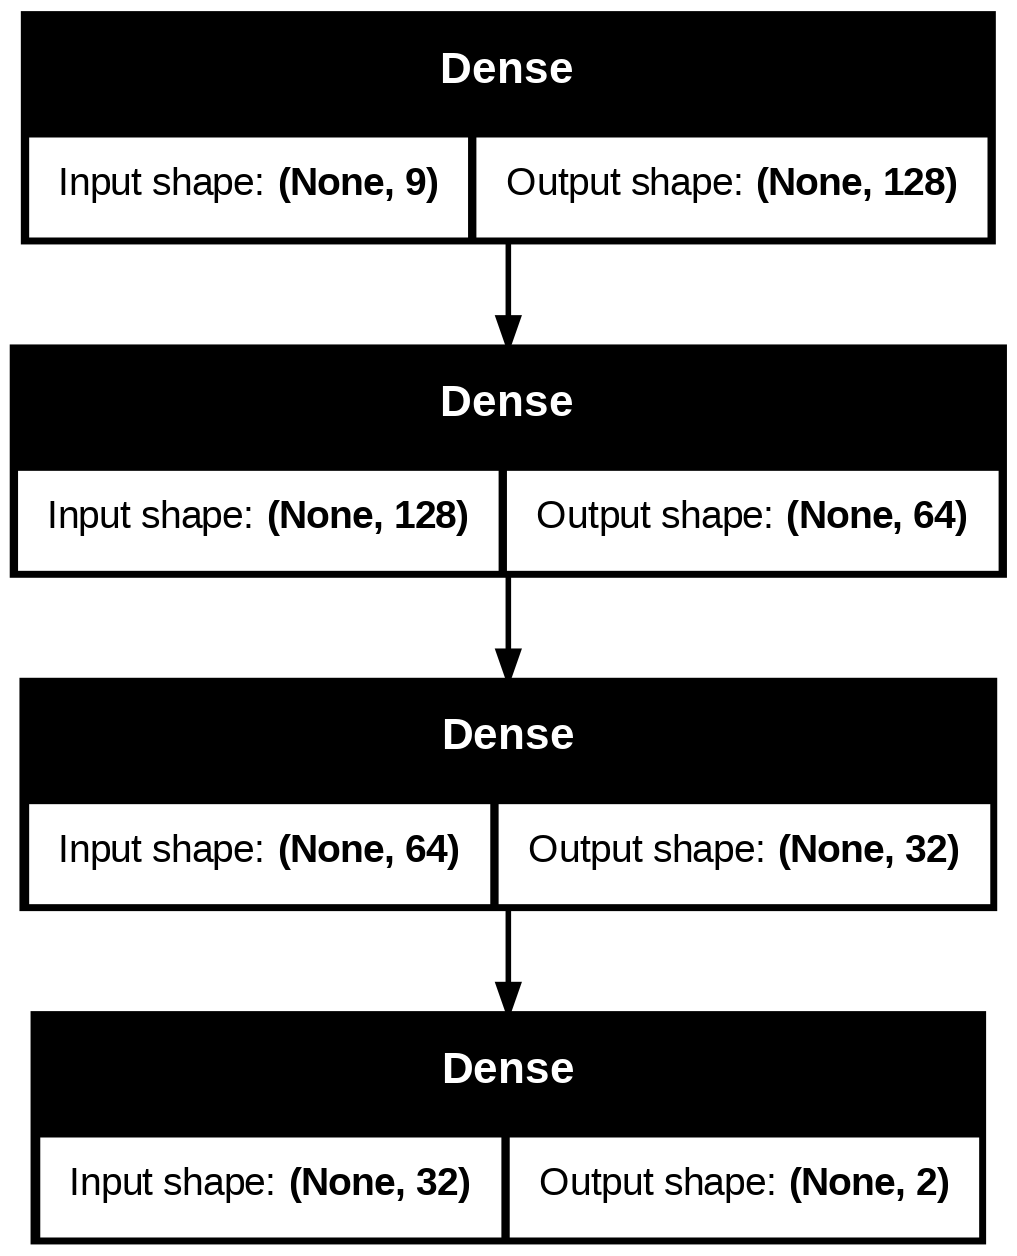

In [82]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes = True)


In [83]:
history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=16,
                    validation_data=(X_test, y_test))


Epoch 1/50
145/145 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9276 - loss: 0.3574 - val_accuracy: 0.9293 - val_loss: 0.2616
Epoch 2/50
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9338 - loss: 0.2457 - val_accuracy: 0.9293 - val_loss: 0.2546
Epoch 3/50
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9372 - loss: 0.2295 - val_accuracy: 0.9293 - val_loss: 0.2522
Epoch 4/50
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9314 - loss: 0.2413 - val_accuracy: 0.9293 - val_loss: 0.2532
Epoch 5/50
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9366 - loss: 0.2234 - val_accuracy: 0.9293 - val_loss: 0.2512
Epoch 6/50
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9404 - loss: 0.2201 - val_accuracy: 0.9293 - val_loss: 0.2525
Epoch 7/50
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9330 - loss: 0.2310 - val_accuracy: 0.9293 - val_loss: 0.2529
Epoch 8/50
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9251 - loss: 0.2495 - val_accuracy: 0.

# Evaluation

In [84]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Akurasi Model: {test_accuracy:.4f}")
print(f"Loss Model: {test_loss:.4f}")


19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9311 - loss: 0.2372 
Akurasi Model: 0.9293
Loss Model: 0.2456


In [85]:
plt.figure(figsize=(12, 5))


<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

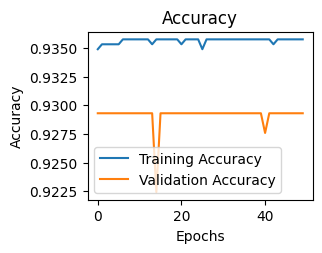

In [86]:
plt.subplot(2, 2, 4)
plt.plot(history.history["accuracy"], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy')

plt.show()

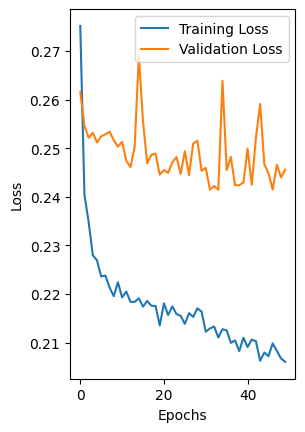

In [87]:
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


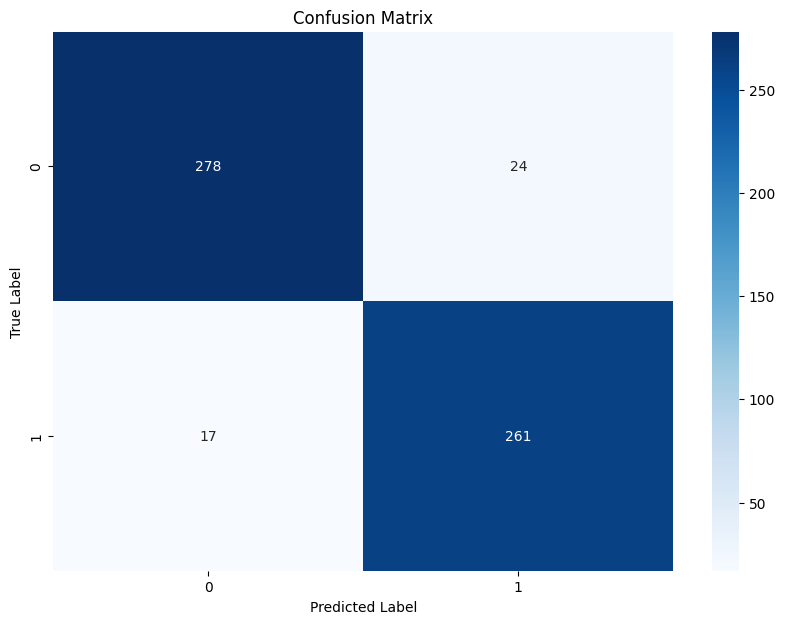

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       302
           1       0.92      0.94      0.93       278

    accuracy                           0.93       580
   macro avg       0.93      0.93      0.93       580
weighted avg       0.93      0.93      0.93       580



In [88]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:")
print(classification_report(y_test, y_pred_classes))

# Deployment

## Model Simulation

In [89]:
# prompt: buatkan model simulation bedasarkan dataset di atas

import pandas as pd
import numpy as np
# Assuming you have a new sample data point (features) for which you want to predict the personality.
# This sample should have the same structure and column names as your original X data before preprocessing.

# Example of a new data point (replace with your actual data):
# Make sure the column names match your original df before splitting X and y
new_data_sample = {
    'Gender': ['Male'],
    'Age': [25],
    'Occupation': ['Student'], # Example, include other categorical columns if they exist
    'Days_Indoors': [2],
    'Days_Outdoors': [5],
    'Hobbies': ['Reading'], # Example, include other categorical columns if they exist
    'Traits': ['Optimistic'], # Example, include other categorical columns if they exist
    'Daily_Sleep_Hours': [7],
    'Happiness_Score': [8],
    'Stage_fear': ['No'],
    'Drained_after_socializing': ['No']
}

new_data_df = pd.DataFrame(new_data_sample)

# Ensure the new data has the same columns as the training data (X before preprocessing)
# If a column is missing in new_data_df but was in the original X, add it with a placeholder (like NaN)
# This is crucial for the preprocessor to work correctly.
for col in X.columns:
    if col not in new_data_df.columns:
        new_data_df[col] = np.nan # Or some other appropriate default/placeholder

# Reorder columns to match the order the preprocessor saw during training
new_data_df = new_data_df[X.columns]


# Apply the same preprocessing steps used on the training data
# Make sure you use the SAME preprocessor object that was fitted on the training data
new_data_scaled = preprocessor.transform(new_data_df)

# Use the trained model to predict the personality for the new data point
predictions = model.predict(new_data_scaled)

# Get the predicted class (index with the highest probability)
predicted_class_index = np.argmax(predictions, axis=1)[0]

# Decode the predicted class index back to the original personality label
predicted_personality = le.inverse_transform([predicted_class_index])[0]

print(f"The predicted personality for the new data sample is: {predicted_personality}")
print(f"Prediction probabilities for each class: {predictions[0]}")
print(f"Mapping of indices to personalities: {dict(zip(le.transform(le.classes_), le.classes_))}")

# You can repeat this process with different `new_data_sample` values to simulate the model's behavior


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
The predicted personality for the new data sample is: Extrovert
Prediction probabilities for each class: [nan nan]
Mapping of indices to personalities: {np.int64(0): 'Extrovert', np.int64(1): 'Introvert'}


## Save Model

In [90]:
# prompt: buatkan save model sesuai dataset

model.save('personality_model.h5')

In [91]:
# Konversi model ke TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Simpan model ke file .tflite
with open('personality_model-dataset.tflite', 'wb') as f:  # Changed file name to 'traffic-prediction-dataset.tflite'
    f.write(tflite_model)

Saved artifact at '/tmp/tmpbocqk12n'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 9), dtype=tf.float32, name='keras_tensor_5')
Output Type:
  TensorSpec(shape=(None, 2), dtype=tf.float32, name=None)
Captures:
  132385081161872: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132385081159760: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132385081162256: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132385081160720: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132385081160528: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132385081158608: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132385081163408: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132385081157456: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [92]:
# Simpan label encoder dan scaler
import joblib
joblib.dump(le, 'label_encoder.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']